# Data Structures and Algorithms
## Group No.8
### 18th Oct, 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

import pandas_datareader.data as web
from datetime import datetime

# 1. Exploring the data

## 1.1 Company name

In [2]:
# Read company names into a dictionary
def readNamesIntoDict():
    d = dict()
    input_file = csv.DictReader(open("SP_500_firms.csv"))
    for row in input_file:
        #print(row)
        d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

In [3]:
namesDict = readNamesIntoDict()

In [4]:
compNames = namesDict.keys()

In [5]:
print(len(namesDict)) # There are 504 companies in total

504


## 1.2 Company stock prices

In [6]:
# Prices into standarad Python data structures

# Read prices into dictionary of lists

def readPricesIntoDict():
    input_file = csv.DictReader(open('SP_500_close_2015.csv', 'r')) 
    d = dict()
    for row in input_file:
        for column, value in row.items():
            d.setdefault(column, []).append(value)
    return d


prices = readPricesIntoDict()

In [7]:
len(prices) # For each stock in the dataset, 497 days stock prices are recorded

497

In [8]:
# Prices into pandas

# Open data with pandas 
filename = 'SP_500_close_2015.csv'
priceData = pd.read_csv(filename,index_col = 0)

print(type(priceData))
print(priceData.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', length=496)


In [9]:
priceData.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,87.354435,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,86.173965,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,86.301853,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,88.033197,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,90.885990,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878


In [10]:
priceData.describe()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,151.240445,45.067555,59.532853,95.540953,27.351820,185.839553,80.967817,163.313504,11.452325,107.930044,...,33.192459,11.069191,42.454640,36.025538,34.701831,38.971944,78.129855,107.543330,28.180492,45.665167
std,7.107680,2.522206,4.742366,6.875068,5.686488,24.958500,6.373760,14.847493,1.288663,8.775297,...,1.329804,1.234858,3.035655,1.275883,1.549875,5.631780,7.133025,7.499312,1.982506,2.258266
min,133.969117,38.121817,46.901920,81.465997,18.213829,134.187800,69.989998,142.671386,8.562809,86.173965,...,30.564587,9.081719,36.734029,32.998169,29.885909,27.600000,65.847064,91.636308,23.501830,39.324541
25%,146.098763,43.318241,55.582699,90.824246,22.882658,166.476869,76.490002,151.131895,10.455896,104.172749,...,32.196438,10.100338,40.161342,35.395930,33.866610,33.460000,71.694150,101.314589,26.931264,43.978874
50%,152.868585,44.921188,59.153699,94.982332,25.408236,182.209625,79.825001,159.705316,11.926511,108.143008,...,33.028862,10.664143,41.758568,36.091841,34.888744,39.355002,77.018419,107.835618,27.954411,45.770399
75%,156.287518,47.124548,63.470802,101.395491,31.392041,201.155203,84.069998,173.011927,12.531814,114.007040,...,34.326218,12.388123,45.348611,36.777727,35.894561,43.884999,85.664143,114.208823,29.715322,47.099767
max,163.841622,49.970225,68.578266,108.674818,39.260511,239.748197,95.559998,200.062855,13.292200,131.110696,...,35.909463,13.431218,49.220191,39.467252,37.264386,50.230000,92.198695,120.001439,32.103599,54.831212


In [11]:
firstPrices =priceData.ix[0] # This is a "series" of first-day prices
print(type(firstPrices))
firstColumnPrices = priceData.ix[:,0] # First company by index
firstColumnPrices.head()

<class 'pandas.core.series.Series'>


Date
2015-01-02    156.678596
2015-01-05    153.145069
2015-01-06    151.511999
2015-01-07    152.610267
2015-01-08    156.267949
Name: MMM, dtype: float64

In [12]:
applePrices = priceData['AAPL'] # Get by column name
msftPrices = priceData['MSFT']
#print(applePrices)
#print(msftPrices)

In [13]:
# Create dataframe from series, then add another series

customPrices = applePrices.to_frame('AAPL')
customPrices = customPrices.join(msftPrices.to_frame('MSFT'))

customPrices.head()

,AAPL,MSFT
Date,,
2015-01-02,105.698620,44.604322
2015-01-05,102.720920,44.194149
2015-01-06,102.730590,43.545497
2015-01-07,104.171098,44.098757
2015-01-08,108.173588,45.396060


In [14]:
# Normalise data by first price

pricesScaled = priceData.divide(priceData.ix[0]) 
pricesScaled.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.977447,1.000223,0.981181,0.983116,0.986090,0.975979,0.995024,0.986819,0.971533,0.986486,...,0.988649,0.978182,0.981651,1.006096,0.937763,0.979271,0.979682,1.037304,0.962531,0.993997
2015-01-06,0.967024,0.988864,0.976324,0.976024,0.967710,0.963755,0.974979,0.986125,0.949635,0.987950,...,0.993909,0.965091,0.967431,1.011030,0.932248,0.980865,0.967657,1.028511,0.925769,0.984299
2015-01-07,0.974034,0.996882,1.015784,0.996511,0.946846,0.980841,0.982997,1.007316,0.951095,1.007770,...,1.002492,0.977455,0.967890,1.011611,0.939601,0.968507,0.999724,1.054090,0.934606,1.004618
2015-01-08,0.997379,1.017372,1.026408,1.011706,0.956284,1.015156,1.008018,1.016145,0.965693,1.040428,...,1.014120,1.004364,0.989450,1.028157,0.946691,1.001196,1.017139,1.065281,0.947685,1.020088


In [15]:
# Plot
priceFig = pricesScaled.plot(legend=False,figsize=(6,4))
priceFig
# Save figure into working directory
#plt.savefig('stocks2015.png', bbox_inches='tight')

In [16]:
len(priceData.columns)

496

# 2. Stock Analysis
## 2.1 Analysing Stocks with Similar Performances
In this part, we calculated the **daily stock price movement** for each stock by computing the **daily return of each stock**

In [17]:
priceDailyReturn = pd.DataFrame.copy(priceData) # Create a new dataframe by copying pricedata
priceDailyReturn.iloc[:,:] = 0  # Set all the elements in dataframe to be zero

# Shape[0] means row numbers, shape[1] means colums numbers
for i in range(1,int(priceDailyReturn.shape[0])):
    priceDailyReturn.iloc[i,:] = (priceData.iloc[i,:] - priceData.iloc[i-1,:]) / priceData.iloc[i-1,:]     
priceDailyReturn.to_csv("priveDailyReturn.csv")
priceDailyReturn.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.022553,0.000223,-0.018819,-0.016884,-0.013910,-0.024021,-0.004976,-0.013181,-0.028467,-0.013514,...,-0.011351,-0.021818,-0.018349,0.006096,-0.062237,-0.020729,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.010664,-0.011356,-0.004950,-0.007213,-0.018640,-0.012526,-0.020145,-0.000703,-0.022539,0.001484,...,0.005321,-0.013383,-0.014486,0.004905,-0.005881,0.001628,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.007249,0.008108,0.040417,0.020989,-0.021561,0.017729,0.008223,0.021489,0.001537,0.020061,...,0.008635,0.012811,0.000474,0.000574,0.007887,-0.012599,0.033138,0.024870,0.009546,0.020643
2015-01-08,0.023967,0.020554,0.010459,0.015249,0.009969,0.034985,0.025453,0.008765,0.015349,0.032406,...,0.011599,0.027530,0.022275,0.016356,0.007546,0.033752,0.017420,0.010617,0.013994,0.015399


In the above part, we created a table containing the daily returns for all stocks.

In [18]:
pdr_describe = priceDailyReturn.describe()
pdr_describe

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,-0.000168,0.000178,-0.000093,0.000811,0.002789,0.002173,0.001146,-0.000009,-0.001134,0.000987,...,0.000198,-0.000758,0.000526,0.000639,-0.000019,-0.001441,0.000342,-0.000254,0.000041,0.000603
std,0.011636,0.013721,0.020014,0.012870,0.017507,0.015613,0.014766,0.019470,0.017846,0.018285,...,0.011881,0.017959,0.015408,0.010174,0.013108,0.019437,0.020380,0.012862,0.017464,0.018589
min,-0.060268,-0.072777,-0.103288,-0.053355,-0.063169,-0.048394,-0.058324,-0.154261,-0.086876,-0.065226,...,-0.049255,-0.087519,-0.061431,-0.035901,-0.062237,-0.076195,-0.188324,-0.047685,-0.046207,-0.122066
25%,-0.006604,-0.006618,-0.011308,-0.006258,-0.006138,-0.007628,-0.007258,-0.006503,-0.011945,-0.008872,...,-0.006656,-0.010464,-0.008938,-0.005863,-0.007078,-0.011532,-0.008299,-0.007809,-0.009895,-0.008379
50%,0.000234,0.000099,0.001177,0.000618,0.002506,0.001506,0.002456,0.000663,-0.000447,0.001928,...,0.001435,-0.000378,0.000559,0.000965,-0.001103,-0.001913,-0.000437,-0.000135,0.000000,0.000100
75%,0.006016,0.008361,0.010136,0.007365,0.011021,0.011010,0.009962,0.008110,0.009801,0.011526,...,0.008593,0.009967,0.009210,0.006438,0.008422,0.010028,0.009643,0.007122,0.011570,0.008861
max,0.041249,0.042617,0.100739,0.067566,0.118426,0.071632,0.037586,0.111417,0.057490,0.046229,...,0.031543,0.065489,0.067132,0.031662,0.034612,0.062262,0.069102,0.071523,0.067133,0.114062


In the below part, we found out companies with different performance during the period.

In [19]:
# Find the maximum daily return
print('The maximum daily return company is ' + pdr_describe.loc['max'].idxmax())
print(pdr_describe.loc['max'].max())

# Find the minimum daily return
print('The minimum daily return company is ' + pdr_describe.loc['min'].idxmin())
print(pdr_describe.loc['min'].min())

The maximum daily return company is FCX
0.286616201466
The minimum daily return company is PWR
-0.285005695727


In [20]:
# Find the overall best company
print('The overall best company is ' +pdr_describe.loc['mean'].idxmax())
print(pdr_describe.loc['mean'].max())
 
# Find the overall worst company
print('The overall worst company is ' +pdr_describe.loc['mean'].idxmin())
print(pdr_describe.loc['mean'].min())

The overall best company is NFLX
0.00378946264328
The overall worst company is CHK
-0.0049070365421


In [21]:
# Find the company with the highest volatility
print('The company with the highest volatility is' + pdr_describe.loc['std'].idxmax())
print(pdr_describe.loc['std'].max())

# Find the company with the least volatility
print('The company with the least volatility is ' + pdr_describe.loc['std'].idxmin())
print(pdr_describe.loc['std'].min())

The company with the highest volatility isFCX
0.0439840636135
The company with the least volatility is KO
0.00904486717773


## 2.2. Correlation
In the part below, we calculated the correlation of each company with others by using the installed package.

In [22]:
filename2 = 'SP_500_firms.csv'
firms = pd.read_csv(filename2)
firms.head()

#priceDailyReturnName = priceDailyReturn.coclumns
#priceDailyReturn.columns = list(firms['Name'])
#priceDailyReturn.columns

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ACN,Accenture plc,Information Technology
4,ATVI,Activision Blizzard,Information Technology


In [23]:
cor_price = priceDailyReturn.corr() # Calculate the pairwise correlation of dataframe columns
cor_price.head(7)

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.409629,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895
ABT,0.598665,1.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.453393,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926
ABBV,0.322637,0.483668,1.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.261255,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245
ACN,0.632050,0.644078,0.318048,1.000000,0.462558,0.481309,0.560768,0.303224,0.395808,0.401344,...,0.388994,0.531869,0.510195,0.563160,0.615344,0.431342,0.353530,0.461179,0.546650,0.414054
ATVI,0.418519,0.434357,0.226854,0.462558,1.000000,0.310525,0.482797,0.223472,0.198081,0.285139,...,0.295286,0.369710,0.398587,0.388844,0.396983,0.365830,0.330461,0.370655,0.346774,0.323145
AYI,0.450872,0.494303,0.269083,0.481309,0.310525,1.000000,0.341863,0.281292,0.311834,0.322694,...,0.292764,0.443355,0.403896,0.478268,0.456437,0.330368,0.231670,0.373889,0.292102,0.306795
ADBE,0.468745,0.585668,0.347331,0.560768,0.482797,0.341863,1.000000,0.291740,0.283060,0.403982,...,0.339726,0.461567,0.460718,0.492877,0.476534,0.313914,0.482703,0.409579,0.445168,0.377819


In this part, we built our own correlation functions to check the result gained above.

In [24]:
def callCor(vec1, vec2):
    """
    input: two vector array
    output: the correlation scores
    """
    vec_idx = range(len(vec1)) # Calculate the length of vector
    
    vec1_sum = sum([vec1[i] for i in vec_idx]) # Calculate the sum of vector1
    vec2_sum = sum([vec2[i] for i in vec_idx]) # Calculate the sum of vector2
    
    vec1_square_sum = sum([pow(vec1[i], 2) for i in vec_idx]) # Calculate the sum of vector1 square
    vec2_square_sum = sum([pow(vec2[i], 2) for i in vec_idx]) # Calculate the sum of vector2 square
    
    product_sum = sum([vec1[i] * vec2[i] for i in vec_idx]) # Calculate the sum of product of vector1 and vector 2
    
    numerator = len(vec1) * product_sum - vec1_sum * vec2_sum
    denominator = (len(vec1) * vec1_square_sum - vec1_sum ** 2)**0.5 * (len(vec1) * vec2_square_sum - vec2_sum ** 2)**0.5
    
    if denominator == 0:
        return 0
    
    result = numerator / denominator
    
    return result

callCor(priceDailyReturn.iloc[:,0],priceDailyReturn.iloc[:,1])

0.59866496204887343

In [25]:
# for this part, because the algorithms is not so fast, so we only calculate the first three company's correlation with other companies
# and make sure our results is the same with the packages result.
def dfCor(df):
    """
    input: dataframe
    output: the pairwise correlation of dataframe
    """
    colname = list(df.columns) # the column name of dataframe
    
    data = pd.DataFrame(np.zeros([len(colname), len(colname)]), columns= colname, index= colname)
    
    for i in colname:
        for j in colname:
            data.loc[i,j] = callCor(df[i],df[j])
        if i == "ABBV":
            break  
    return data

dfCor(priceDailyReturn).head()
            

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.409629,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895
ABT,0.598665,1.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.453393,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926
ABBV,0.322637,0.483668,1.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.261255,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245
ACN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ATVI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Since the time needed for calculating the correlation for all companies is quite long through using our own algorithm, we calculated only the first three companies and found out that the results are exactly the same as the previous one. In this case, it could be concluded that the correlation coefficients calculated by the python packages are correct.

After getting all the tables, we created functions to call the full name of a company using its ticker only. There are two ways that we explored in this part. Firstly, the names and the correlation were taken from 2 different tables using a `callName` function and `callCor` function. Secondly, the two tables loaded in the console were merged together to get one table with all the information needed. Then, `callName2` function was created to smoothen the merging. Then, `callCor2` was defined to get the correlation and both names of the companies. 

In [26]:
def callName(n):
    x = firms[firms.Symbol == str(n)].Name.item()
    return str(x)
callName('ABT')

'Abbott Laboratories'

In [27]:
def callName2(n):
    x = namesDict[n][0]
    return x
callName2('ABT')  

'Abbott Laboratories'

In [28]:
def callCor(a, b):
    cor = cor_price[a][b]
    print('The correlation between %s and %s is %s' % (callName(a), callName(b), cor))

callCor('ABT', 'AYI')

The correlation between Abbott Laboratories and Acuity Brands Inc is 0.494302519137


In [29]:
# Merge the name of each company into price dataframe
cor_price_name = cor_price.copy()
cor_price_name['Name'] = ""

for i in list(cor_price_name):
    if i == 'Name':
        pass
    else:
        cor_price_name.set_value(i, 'Name', callName2(i))

cor_price_name.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS,Name
MMM,1.000000,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895,3M Company
ABT,0.598665,1.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926,Abbott Laboratories
ABBV,0.322637,0.483668,1.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245,AbbVie
ACN,0.632050,0.644078,0.318048,1.000000,0.462558,0.481309,0.560768,0.303224,0.395808,0.401344,...,0.531869,0.510195,0.563160,0.615344,0.431342,0.353530,0.461179,0.546650,0.414054,Accenture plc
ATVI,0.418519,0.434357,0.226854,0.462558,1.000000,0.310525,0.482797,0.223472,0.198081,0.285139,...,0.369710,0.398587,0.388844,0.396983,0.365830,0.330461,0.370655,0.346774,0.323145,Activision Blizzard


In [30]:
def callCor2(a, b):
    cor = cor_price_name[a][b]
    name_a = cor_price_name['Name'][a]
    name_b = cor_price_name['Name'][b]
    print('The correlation between %s and %s is equal to %s' % (name_a, name_b, cor))
    
callCor2('ABBV', 'ACN')

The correlation between AbbVie and Accenture plc is equal to 0.318047748008


We ran both correlation calling functions using `%timeit` and the result is the `callCor2` with the merged table was faster with fastest time of 41.1 µs per loop, while `callCor` took approximately 1.38 ms, which is way slower.

In this part we explored the highest and lowest correlation of each company. Using `describe()` function we get the summary of each column. Using those informations, a new table containing the company ticker and their lowest and highest correlation with their corresponding tickers.

In [31]:
cor_price.describe()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,0.461465,0.502471,0.318588,0.485292,0.342000,0.358049,0.407217,0.286596,0.338180,0.337362,...,0.337608,0.423734,0.404635,0.449822,0.470841,0.306327,0.299765,0.398030,0.417373,0.306473
std,0.120494,0.114988,0.085071,0.118383,0.095141,0.086053,0.108851,0.082113,0.085109,0.105296,...,0.163069,0.098588,0.094782,0.117506,0.120059,0.088284,0.086804,0.097566,0.159499,0.093307
min,0.161831,0.165613,0.075441,0.158036,0.003083,0.110716,0.031734,-0.031248,0.083691,0.017283,...,0.029882,0.145285,0.152021,0.121672,0.161702,0.045175,0.018138,0.148654,0.030176,0.039721
25%,0.383004,0.421799,0.267029,0.396349,0.290686,0.300497,0.340668,0.236980,0.285399,0.280438,...,0.236055,0.350543,0.342716,0.365252,0.381844,0.260932,0.252634,0.335236,0.321455,0.242796
50%,0.466096,0.512526,0.314621,0.486101,0.347423,0.362478,0.414762,0.288885,0.342235,0.336069,...,0.305559,0.430159,0.405600,0.455105,0.474097,0.308786,0.310659,0.396175,0.415606,0.306866
75%,0.546741,0.584136,0.363310,0.577805,0.407418,0.414250,0.486107,0.344370,0.397316,0.395577,...,0.399817,0.497980,0.469120,0.532872,0.556206,0.365374,0.356226,0.466059,0.500168,0.363110
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Find the bottom correlated companies
cor_bottom = cor_price.abs().idxmin(axis=0)
cor_bottom = pd.DataFrame(cor_bottom, columns = ["cor_bottom"])

# Find the bottom correlation coefficients
cor_coe = cor_price.abs().min(axis=0)
cor_coe = pd.DataFrame(cor_coe, columns = ["bot_coe"])

# Join the bottom correlation companies and coefficients together
result = cor_bottom.join(cor_coe)
result.head()

,cor_bottom,bot_coe
MMM,NEM,0.161831
ABT,NRG,0.165613
ABBV,NEM,0.075441
ACN,NEM,0.158036
ATVI,PWR,0.003083


In [33]:
# Find the top correlated companies
# Replace the correlation coefficient 1 to 0 to find the top correlated companies
cor_modify = cor_price.replace(1,-1)
cor_top = cor_modify.idxmax(axis=0) 
cor_top = pd.DataFrame(cor_top, columns = ["cor_top"])

top_coe = cor_modify.max(axis=0)
top_coe = pd.DataFrame(top_coe, columns = ["top_coe"])

result2 = cor_top.join(top_coe)
result2.head()

,cor_top,top_coe
MMM,ITW,0.768481
ABT,MMC,0.737158
ABBV,TMO,0.575175
ACN,MMC,0.725520
ATVI,EA,0.561049


In [34]:
# Combine the above two tables together 
related = result.join(result2)
related.head()

,cor_bottom,bot_coe,cor_top,top_coe
MMM,NEM,0.161831,ITW,0.768481
ABT,NRG,0.165613,MMC,0.737158
ABBV,NEM,0.075441,TMO,0.575175
ACN,NEM,0.158036,MMC,0.725520
ATVI,PWR,0.003083,EA,0.561049


The maximum and minimum correlation table was created. Thus, we could find the correlation of five tech companies, i.e. Amazon, Microsoft, Facebook, Apple and Google. The tickers of these companies are AMZN, MSFT, FB, AAPL, and GOOG/GOOGL (Google has two for Class A and Class C shares) respectively.

In [35]:
techCor = related.ix[['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOG', 'GOOGL'],:]
techCor

,cor_bottom,bot_coe,cor_top,top_coe
AMZN,SRCL,0.056440,GOOGL,0.585572
MSFT,SRCL,0.028884,MMC,0.604546
FB,NEM,0.002831,FISV,0.619677
AAPL,RRC,0.112708,ITW,0.601265
GOOG,SRCL,0.017145,GOOGL,0.989365
GOOGL,RIG,0.009515,GOOG,0.989365


In [36]:
for j in list(techCor.index):
    callCor2(j, techCor.ix[j,0])
    callCor2(j, techCor.ix[j,2])

The correlation between Amazon.com Inc and Stericycle Inc is equal to 0.0564404668271
The correlation between Amazon.com Inc and Alphabet Inc Class A is equal to 0.585572457937
The correlation between Microsoft Corp. and Stericycle Inc is equal to 0.0288841252305
The correlation between Microsoft Corp. and Marsh & McLennan is equal to 0.604546183629
The correlation between Facebook and Newmont Mining Corp. (Hldg. Co.) is equal to -0.00283066410658
The correlation between Facebook and Fiserv Inc is equal to 0.619677467282
The correlation between Apple Inc. and Range Resources Corp. is equal to 0.112708151299
The correlation between Apple Inc. and Illinois Tool Works is equal to 0.601265458624
The correlation between Alphabet Inc Class C and Stericycle Inc is equal to 0.0171445946964
The correlation between Alphabet Inc Class C and Alphabet Inc Class A is equal to 0.989365335424
The correlation between Alphabet Inc Class A and Transocean is equal to 0.0095152561825
The correlation betwee

We obtained the maximum and minimum correlation of the 5 technology companies. Google who trades with two tickers (GOOG and GOOGL) will always be highly correlated to each other since the two stocks are essentially identical despite the difference in voting rights. However, their lowest correlation are different although both companies comes from a different industry. Two tech giants, Amazon Inc and Google stocks have relatively high correlation to each other with a correlation of 0.59, which is not too surprising since they released almost the same products recently.

The biggest surprise might come from Apple that was closely related to Illinois Tool Works (ITW), a manufacturing company. However, ITW also produces small electronic components, which made the correlation less surprising. Moreover, Facebook's maximum correlation came from a company called Fiserv, a financial technology company. Online payment might be an area that Facebook looking to explore, which could make sense of the correlation. Interestingly, the majority of the Tech companies had their lowest correlation against companies operating in natural resources, especially Oil and Gas.


# 3. Clustering Algorithm

In [37]:
cor_price_graph = cor_price.copy()
cor_price_graph.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.409629,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895
ABT,0.598665,1.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.453393,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926
ABBV,0.322637,0.483668,1.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.261255,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245
ACN,0.632050,0.644078,0.318048,1.000000,0.462558,0.481309,0.560768,0.303224,0.395808,0.401344,...,0.388994,0.531869,0.510195,0.563160,0.615344,0.431342,0.353530,0.461179,0.546650,0.414054
ATVI,0.418519,0.434357,0.226854,0.462558,1.000000,0.310525,0.482797,0.223472,0.198081,0.285139,...,0.295286,0.369710,0.398587,0.388844,0.396983,0.365830,0.330461,0.370655,0.346774,0.323145


In [38]:
for i in range(0,cor_price_graph.shape[0]):
    for j in range(i,cor_price_graph.shape[1]):
            cor_price_graph.iloc[j,i] = 0
cor_price_graph.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,0.0,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.409629,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895
ABT,0.0,0.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.453393,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926
ABBV,0.0,0.000000,0.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.261255,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245
ACN,0.0,0.000000,0.000000,0.000000,0.462558,0.481309,0.560768,0.303224,0.395808,0.401344,...,0.388994,0.531869,0.510195,0.563160,0.615344,0.431342,0.353530,0.461179,0.546650,0.414054
ATVI,0.0,0.000000,0.000000,0.000000,0.000000,0.310525,0.482797,0.223472,0.198081,0.285139,...,0.295286,0.369710,0.398587,0.388844,0.396983,0.365830,0.330461,0.370655,0.346774,0.323145


In [39]:
# Save the graph to csv file
cor_price_graph.to_csv('cor_price_graph.csv')

## 3.1.Represent the Edge

In [40]:
edge = [] # Make the edge a list to sort it more conveniently
for i in cor_price_graph.columns[0:cor_price_graph.shape[0]]:
    for j in cor_price_graph.index[0:cor_price_graph.shape[1]]:
        if(cor_price_graph[i][j] == 0):
            pass
        else:
            t = (cor_price_graph[i][j], i, j)  # Denote the edge with (source, destination, weight)
            edge.append(t)

In [41]:
len(edge)

122760

There are 122760 edges in total and we sort those edges from the highest to lowest

In [42]:
# Sort the edge by weight(correlation)
edge_sorted = sorted(edge, key = lambda edge: edge[0], reverse=True)
edge_sorted[0:20]

[(0.99999999998958355, 'TYC', 'JCI'),
 (0.98936533542371641, 'GOOG', 'GOOGL'),
 (0.9772964706960382, 'FOX', 'FOXA'),
 (0.97468693249343563, 'NWS', 'NWSA'),
 (0.95862277805527796, 'DISCK', 'DISCA'),
 (0.92459154461690818, 'STI', 'BBT'),
 (0.92183689634860255, 'STI', 'PNC'),
 (0.91872546915349163, 'STI', 'HBAN'),
 (0.91744483601599958, 'DTE', 'CMS'),
 (0.91668172739329046, 'MET', 'LNC'),
 (0.91665580199911156, 'JPM', 'C'),
 (0.91587402651772964, 'EQR', 'AVB'),
 (0.91526890116568038, 'PRU', 'MET'),
 (0.91242682367066807, 'WFC', 'PNC'),
 (0.90858198736457718, 'XEL', 'CMS'),
 (0.90854263696941329, 'UDR', 'EQR'),
 (0.90822201011698056, 'HAL', 'BHI'),
 (0.90820313676216835, 'ESS', 'AVB'),
 (0.90568929732937653, 'PNC', 'BBT'),
 (0.90567047869034278, 'XEL', 'DTE')]

## 3.2. Model the Sets of Nodes

First, initialize each node points to itself

In [43]:
nodePointers = {}
length = cor_price_graph.shape[0]
for i in cor_price_graph.columns[0:length]:
    nodePointers[i] = i

## 3.3 Clustering Algorithm

We believe this greedy algorithm is called Kruskal’s algorithm. Which is used to solve the minimum-spanning-tree problem in graph theory. The difference between our implementation and the classical Kruskal’s algorithm, is that we start with the heaviest edges and that we limit our iterations to a given k.

In [56]:
def createVertices(data):
    #a graph consists of two elements: a list of vertices (companies) and a list of edges(correlation between two companies)
    graph = {}
    graph = data.columns.tolist()  
    return graph

def getClusters(k, data, sortededge):
    vertices = createVertices(data)
    edges = sortededge #sort edges based on weight with the highest weighed edge first in list
    clusters = []
    for vertex in vertices:
        s = set()
        s.add(vertex)
        clusters.append(s)
    #Iterate through the k highest correlation-edges
    for i in range(0, k):
        edge = edges[i]
        source_cluster = findVertexSet(clusters, edge[1]) #find which cluster the source of the edge belongs to
        destination_cluster = findVertexSet(clusters, edge[2]) #find which cluster the destination of the edge belongs to
        if (source_cluster != destination_cluster): # if the edge is connecting two different sets (source and destination is currently in two different sets)
            merged_cluster = source_cluster.union(destination_cluster) #merge source-cluster with destination-cluster
            clusters.remove(source_cluster) #remove source-cluster from the cluster-list
            clusters.remove(destination_cluster) #remove destination-cluster from the cluster-list
            clusters.append(merged_cluster) #add the newly merged cluster to the cluster-list
    return clusters

#returns the cluster for which a company resides in
def findVertexSet(clusters, company):
    for cluster in clusters:
        if company in cluster:
            return cluster
    return None

print(getClusters(30, cor_price_graph, edge_sorted))
a = len(getClusters(30, cor_price_graph, edge_sorted))
b = len(getClusters(100, cor_price_graph, edge_sorted))
c = len(getClusters(1000, cor_price_graph, edge_sorted))
print(a, b, c)


[{'MMM'}, {'ABT'}, {'ABBV'}, {'ACN'}, {'ATVI'}, {'AYI'}, {'ADBE'}, {'AAP'}, {'AES'}, {'AET'}, {'AMG'}, {'AFL'}, {'A'}, {'APD'}, {'AKAM'}, {'ALK'}, {'ALB'}, {'AA'}, {'ALXN'}, {'ALLE'}, {'AGN'}, {'ADS'}, {'LNT'}, {'ALL'}, {'MO'}, {'AMZN'}, {'AEE'}, {'AAL'}, {'AEP'}, {'AXP'}, {'AIG'}, {'AMT'}, {'AWK'}, {'AMP'}, {'ABC'}, {'AME'}, {'AMGN'}, {'APH'}, {'APC'}, {'ADI'}, {'ANTM'}, {'AON'}, {'APA'}, {'AIV'}, {'AAPL'}, {'AMAT'}, {'ADM'}, {'AJG'}, {'AIZ'}, {'T'}, {'ADSK'}, {'ADP'}, {'AN'}, {'AZO'}, {'AVGO'}, {'AVY'}, {'BLL'}, {'BCR'}, {'BAX'}, {'BDX'}, {'BBBY'}, {'BRK-B'}, {'BBY'}, {'BIIB'}, {'BLK'}, {'HRB'}, {'BA'}, {'BWA'}, {'BXP'}, {'BSX'}, {'BMY'}, {'BF-B'}, {'CHRW'}, {'CA'}, {'COG'}, {'CPB'}, {'COF'}, {'CAH'}, {'KMX'}, {'CCL'}, {'CAT'}, {'CBG'}, {'CBS'}, {'CELG'}, {'CNC'}, {'CNP'}, {'CTL'}, {'CERN'}, {'CF'}, {'SCHW'}, {'CHK'}, {'CVX'}, {'CMG'}, {'CB'}, {'CHD'}, {'CI'}, {'XEC'}, {'CINF'}, {'CTAS'}, {'CSCO'}, {'CFG'}, {'CTXS'}, {'CME'}, {'COH'}, {'CTSH'}, {'CL'}, {'CMCSA'}, {'CAG'}, {'CXO'}, {'

### 3.3.1 Compare Different Values of k

When k = 30 we have 474 clusters and two of them are: {'ZION', 'CMA'} and {'C', 'JPM', 'BAC'}. When k = 100 we have 449 clusters. If we look at the two earlier clusters (from when k = 30), we see that these two clusters is now in one cluster (k = 100): {'WFC', 'FITB', 'RF', 'BAC', 'GS', 'BBT', 'MS', 'USB', 'STI', 'C', 'HBAN', 'CMA', 'JPM', 'ZION', 'KEY', 'PNC'}. This makes sense since both clusters included companies from the financial sector, and we would expect these companies to have a high correlation.

By increasing k, more companies with high correlation will merge into bigger clusters and the number of clusters will decrease as long as the companies is not already in the cluster. As we can see from the length of the list, by changing k from 100 to 1000 will reduce the number of clusters from 449 to 327. However, since the correlation-edge is decreasing in each iteration by having a very large k-value, a large k-value would cluster a lot of companies, and these might not have as high correlation.


### 3.3.2 Verify that the Stocks in the clusters Perform Similarly

When using k = 30 we get (among others) a cluster with ZION and CMA, and a cluster including C, JPM and BAC. We will look at these two clusters to see if it makes sense that they are in the same cluster, and also verify that they perform similarly.

#### Cluster1: ZION & CMA

In [57]:
zionPrices = priceData['ZION'] 
cmaPrices = priceData['CMA']

cluster1Prices = zionPrices.to_frame('ZION')
cluster1Prices = cluster1Prices.join(cmaPrices.to_frame('CMA'))

cluster1Scaled = cluster1Prices.divide(cluster1Prices.ix[0]) 


In [58]:
cluster1Scaled.head()

,ZION,CMA
Date,,
2015-01-02,1.000000,1.000000
2015-01-05,0.962531,0.964355
2015-01-06,0.925769,0.935407
2015-01-07,0.934606,0.944480
2015-01-08,0.947685,0.964355


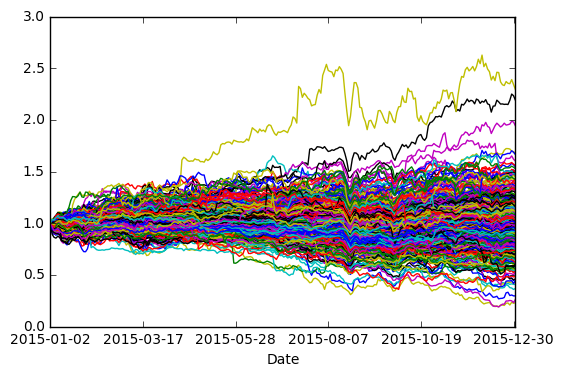

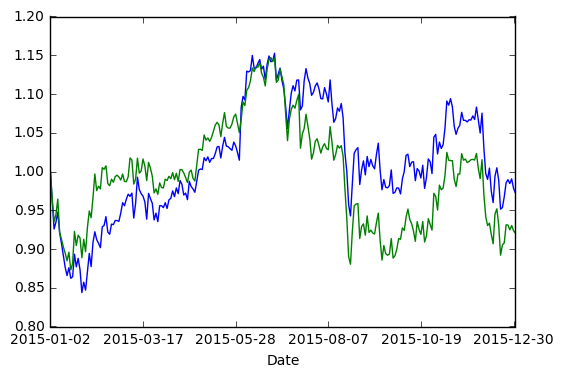

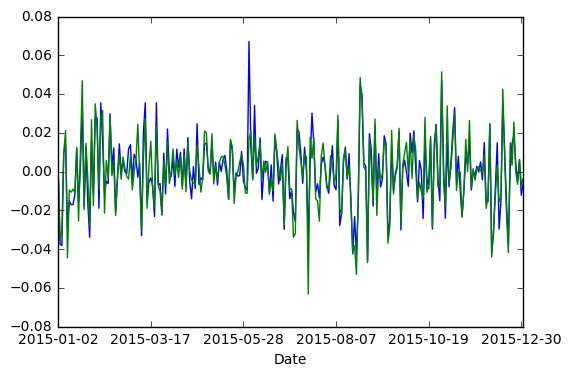

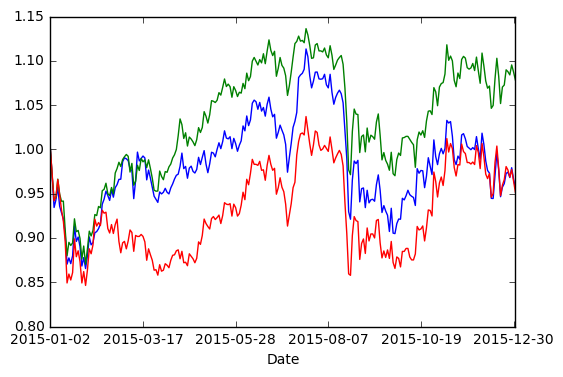

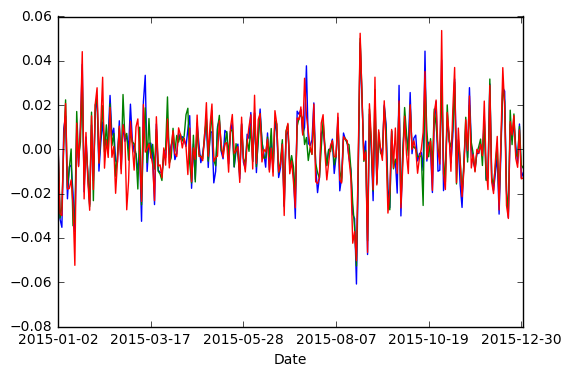

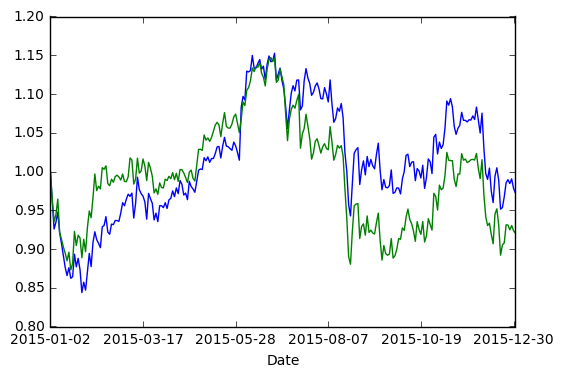

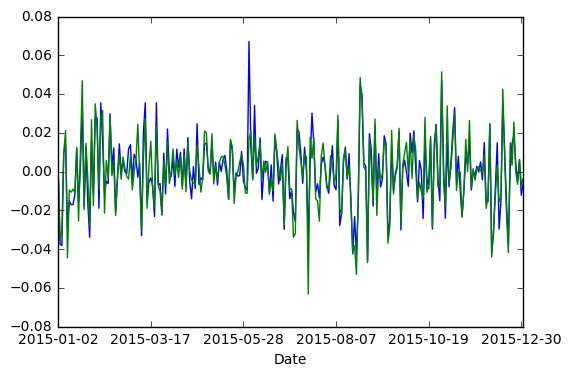

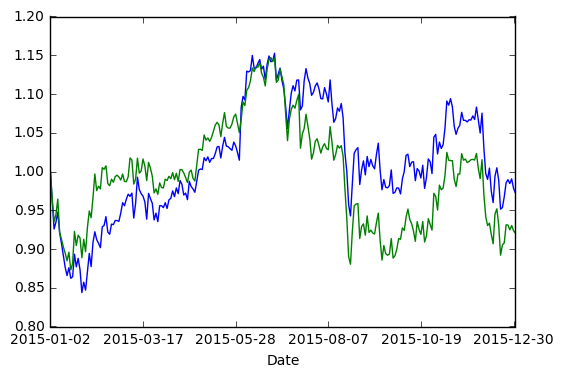

In [61]:
cluster1Fig = cluster1Scaled.plot(legend=False,figsize=(6,4))
plt.show()
# plt.savefig('cluster1price.png', bbox_inches='tight')

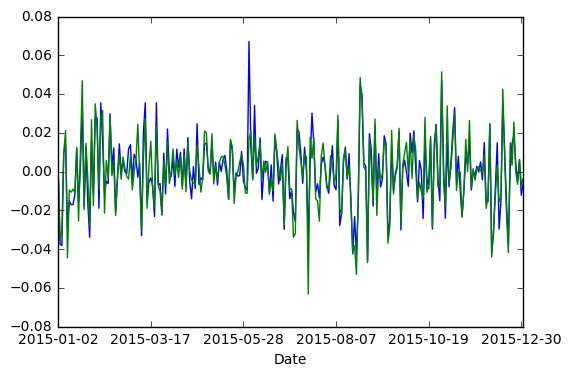

In [62]:
zionReturns = priceDailyReturn['ZION'] 
cmaReturns = priceDailyReturn['CMA']

cluster1Returns = zionReturns.to_frame('ZION')
cluster1Returns = cluster1Returns.join(cmaReturns.to_frame('CMA'))

cluster1ReturnFig = cluster1Returns.plot(legend=False,figsize=(6,4))
plt.show()
# plt.savefig('cluster1return.png', bbox_inches='tight')

From the two figures we can verify that these two companies perform similarly on both price and return. If we look into what the companies are doing, we can see some similarities. ZION is a bank holding company and CMA is a financial service company. Both are in the financial sector and located in the United States, so in this case the clustering makes sense.

#### Cluster2: C, JPM & BAC

In [49]:
cPrices = priceData['C'] 
jpmPrices = priceData['JPM']
bacPrices = priceData['BAC']

cluster2Prices = cPrices.to_frame('C')
cluster2Prices = cluster2Prices.join(jpmPrices.to_frame('JPM'))
cluster2Prices = cluster2Prices.join(bacPrices.to_frame('BAC'))

cluster2Scaled = cluster2Prices.divide(cluster2Prices.ix[0])

In [50]:
cluster2Scaled.head()

,C,JPM,BAC
Date,,,
2015-01-02,1.000000,1.000000,1.000000
2015-01-05,0.968485,0.968955,0.970950
2015-01-06,0.934390,0.943831,0.941900
2015-01-07,0.943052,0.945271,0.946369
2015-01-08,0.957243,0.966395,0.965922


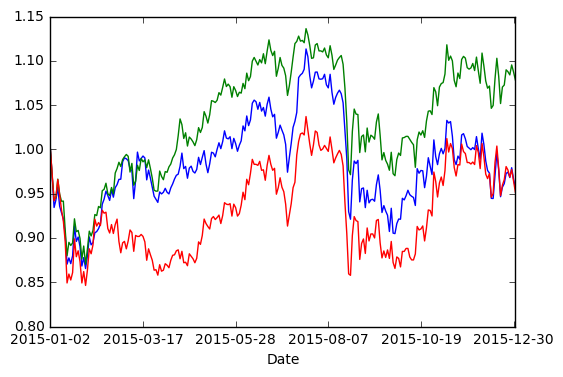

In [63]:
cluster2Fig = cluster2Scaled.plot(legend=False,figsize=(6,4))
plt.show()
# plt.savefig('cluster2price.png', bbox_inches='tight')

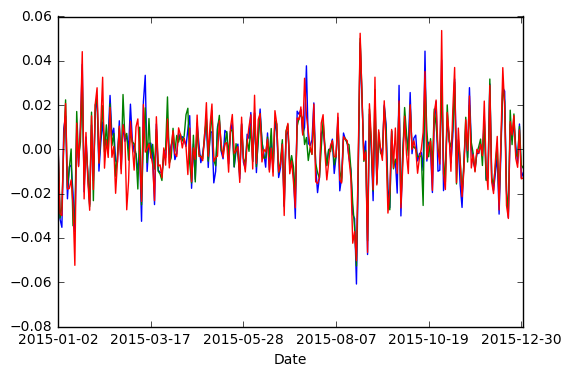

In [64]:
cReturns = priceDailyReturn['C'] 
jpmReturns = priceDailyReturn['JPM']
bacReturns = priceDailyReturn['BAC']

cluster2Returns = cReturns.to_frame('C')
cluster2Returns = cluster2Returns.join(jpmReturns.to_frame('JPM'))
cluster2Returns = cluster2Returns.join(bacReturns.to_frame('BAC'))

cluster2ReturnFig = cluster2Returns.plot(legend=False,figsize=(6,4))
plt.show()
#plt.savefig('cluster2return.png', bbox_inches='tight')

From the two figures we can verify that these three companies perform similarly on both price and return. If we look into what the companies are doing, we can see a lot of similarities. The three companies C (Citigroup Inc), JPM (JP Morgan Chase & Co) and BAC (Bank of America Corporation) are all multinational banking and financial services companies. They are all in the financial sector and have their headquarter in the United States, so in this case the clustering makes sense.

# 4. Extra Part
## 4.1 In-depth Analysis
### 4.1.1 Performance Analysis by Selecting Stocks from Different Clusters

In this part we are going to analyse the clusters by testing the return and volatility. To do this we set different $k$ to get different number of clusters consisting of different stocks. Our initial hypothesis suggest that if there are more stocks from different clusters, the portfolio is more diversified. 

In this analysis we use the one year return of each stock by calculating the difference in price on the first and the last day of trading of the year. We assume that an investor holds the portfolios without selling any stocks during one year period. To simplify the analysis, the number of stock held is only one unit of stock for each ticker. Then, from each cluster, two random stocks are added into the portfolio to test the investor's diversification.

We initiate the cluster by dividing the stocks that has already been assigned to a cluster that the ones that has not using `portfolioGen` function. Then, from each cluster In order to get the data needed to calculate both returns and volatility, a `portfTable` function is created, which includes the price on day 1 and the last day, the weight of each stock in the portfolio and the return of each stock. Then, from the table we could obtain the weighted return of each stock and to get the overall return of the portfolio we call `portfReturn` function.

In [65]:
from random import randint

def clusterGroup(clusters): # separate clustered stocks and non-clustered stocks
    group = []
    for cluster in clusters:
        if len(cluster) > 1:
            group.append(cluster)
    return group

def portfolioGen(group): # this is to generate portfolio using specified number of stocks from each cluster
    portf = []  
    for cluster in group:
        portf.append(list(cluster)[0]) # in this case, we chose 2 stocks from each cluster
        portf.append(list(cluster)[randint(1, len(cluster)-1)])
    return portf

def portfTable(cluster): # create a helper table to get all information needed to calculate risk and return
    portf = priceData.ix[[0,251], cluster]
    portf = portf.T
    portf.ix[:, 'weight'] = portf.ix[:,0] / portf.ix[:,0].sum() # the proportion of holding a stock in the portfolio
    portf.ix[:, 'one_y_return'] = portf.ix[:,1] - portf.ix[:,0] # nominal return of holding a stock for a year
    portf.ix[:, 'percent_return'] = portf.ix[:,3] / portf.ix[:,1] * 100
    portf.ix[:, 'weighted_return'] = portf.ix[:,4] * portf.ix[:, 2]
    return portf

def portfReturn(table): # calculate the return of a portfolio
    port_return = sum(table.weighted_return)
    return port_return

Secondly, we calculate the volatility of portfolio, the naive calculation of this is simply multiply individual stock's standard deviation by the weight of it in the portfolio. However, we used the covariance to calculate the portfolio's risk. To get the accurate number, we need the daily return of each stock which is represented by `portfDaily` function. After getting the daily retrun, we use the information in `portfTable` function and combine them to get the risk of the portfolio.

In [54]:
def portfDaily(cluster): # obtain the daily price return of stocks in portfolio
    dailyR = priceDailyReturn.ix[:, cluster] #slice the daily return table
    return dailyR

def portfVolatility(daily_return, table):
    covmatrix = np.cov(daily_return[1:].T) # calculate the covariance of the portfolio stocks daily return
    weight = np.array(table.weight) # the weight of portfolio
    volatility = np.sqrt(weight.T.dot(covmatrix).dot(weight)) # calculate the standard deviation of the portfolio
    return volatility

The next step is to obtain the data by getting the clusters from the set of edges in the previous sections. We tried 48 different $k$, which will return as 48 different portfolios, and create a table of risk and return. 

In [67]:
k_list = list(range(100, 2000, 50)) + list(range(2000, 3050, 100))

ClusGroup = []

for k in k_list: # initiate the cluster
    cluster = getClusters(k, cor_price_graph, edge_sorted)    
    ClusGroup.append(clusterGroup(cluster))

no_cluster = []
for group in ClusGroup: # calculate the number of cluster for each k
    no_cluster.append(len(group))

portfolioGroup = []
for cluster in ClusGroup: # take 2 random stocks from each cluster to portfolio
    portfolioGroup.append(portfolioGen(cluster))

GroupReturn = []
for portf in portfolioGroup: # create helper table and calculate return
    GroupReturn.append(portfReturn(portfTable(portf)))

GroupVolatility = []
for portf in portfolioGroup: # 
    dailyR = portfDaily(portf)
    table = portfTable(portf)
    GroupVolatility.append(portfVolatility(dailyR, table) * 100)

ClusterRiskReturn = pd.DataFrame({
    'k': k_list,    
    'no_cluster': no_cluster,
    'returns': GroupReturn,
    'volatility': GroupVolatility
    })
    
ClusterRiskReturn


,k,no_cluster,returns,volatility
0,100,13,11.828134,1.172538
1,150,17,7.374836,1.067243
2,200,15,5.902864,1.131048
3,250,17,5.002715,1.133731
4,300,21,3.283398,1.112507
5,350,18,4.287247,1.143203
6,400,18,6.065528,1.114675
7,450,17,6.083043,1.146667
8,500,20,6.185105,1.124742
9,550,21,10.231369,1.107742


The relationship between the number of clusters, returns and volatility became quite clear from the table. The graph is also plotted below.

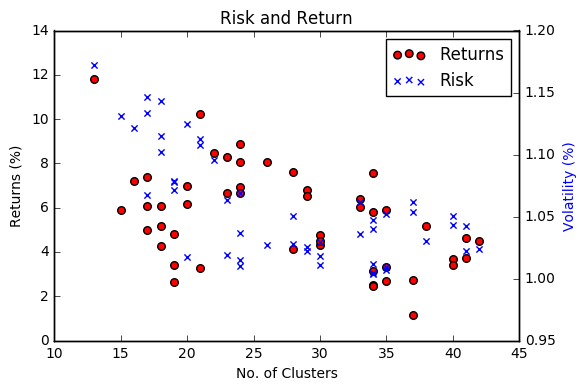

In [68]:
def plot_portf_return():
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    ax1.scatter(ClusterRiskReturn.no_cluster, ClusterRiskReturn.returns, s=30, c = 'r', label = 'Returns')
    ax2.scatter(ClusterRiskReturn.no_cluster, ClusterRiskReturn.volatility, c = 'b', marker='x', label = 'Risk')    
    
    ax1.set_xlabel('No. of Clusters')
    ax1.set_ylabel('Returns (%)')
    ax2.set_ylabel('Volatility (%)', color = 'b')
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)    

    plt.title('Risk and Return')
    plt.show()
    # plt.savefig('plot_portf_return.png', dpi = 300, bbox_inches='tight')

plot_portf_return()

According to the table and graph, as the number of clusters go up, the portfolio that contains 2 stocks from each cluster generally has less return and less volatility. It indicates that building portfolio based on more clusters is one way to diversify a portfolio as the risk goes down. The riskiness seems to hit an optimal level when $k$ is between 1500 to 1700 edges. With the number of cluster of around 34 to 35, the volatility is very close to 1 percent. Interestingly, as $k$ goes up and the number of cluster shrinks due to some cluster combination, the volatility become slightly lower but the returns fall significantly. The number of stocks in one cluster increases as more edges are explored and it increase the variation of stocks that can be picked in a portfolio. In clusters with bigger $k$, the risk is already diversified slightly as some clusters that behave differently are combined into one big cluster.

The relationship among clusters, risk and returns was highlighted by this figures but there are more things that could be explored. So far, we created a portfolio under the assumption that the portfolio holders invest in the same number of stock for every given stock. In reality, many investors adjust the weight of one stock according to the risk and return. In addition, we added only two stocks from one portfolio and there could be more possibilities if different numbers are added based on the characteristic of each cluster.



### 4.1.2 Performance Analysis for Different Time Periods

In [ ]:
def getStock(symbol, start, end):
    df =  web.DataReader(symbol, 'yahoo', start, end)
    return df

def getClose(df):
    L = df['Adj Close'].values.tolist()
    return L

def getPrice(data, start, end):
    newpriceData = pd.DataFrame()
    for key in data:
        stock = getStock(key, start, end)
        closingPrices = getClose(stock)
        newpriceData.iloc[:,i] = closingPrices
    newpriceData.to_csv("SP_500_close_2014")
    return newpriceData

start = datetime(2014,1,1)
end = datetime(2014,12,31)
getPrice(priceData, start, end)


# Plot

In [ ]:
##### Prices into pandas

filename = 'SP_500_close_2014.csv'
priceData1 = pd.read_csv(filename,index_col = 0)

print(type(priceData1))
print(priceData1.columns)

In [ ]:
pricesScaled1 = priceData1.divide(priceData.ix[0]) 
pricesScaled1.head()

In [ ]:
# Plot

priceFig1 = pricesScaled1.plot(legend=False,figsize=(6,4))
priceFig1
# Save figure into working directory
# plt.savefig('stocks2015.png', bbox_inches='tight')

In [ ]:
priceDailyReturn1 = pd.DataFrame.copy(priceData1)
priceDailyReturn1.iloc[:,:] = 0

for i in range(1,int(priceDailyReturn1.shape[0])):
    priceDailyReturn1.iloc[i,:] = (priceData1.iloc[i,:] - priceData1.iloc[i-1,:]) / priceData1.iloc[i-1,:]     
priceDailyReturn1.to_csv("priceDailyReturn1.csv")
priceDailyReturn1.head()

In [ ]:
cor_price1 = priceDailyReturn1.corr()
cor_price1.head(7)

In [ ]:
cor_price_name1 = cor_price1.copy()
cor_price_name1['Name'] = ""

for i in list(cor_price_name1):
    if i == 'Name':
        pass
    else:
        cor_price_name1.set_value(i, 'Name', callName2(i))

cor_price_name1.head()

In [ ]:
cor_price_graph1 = cor_price1.copy()
cor_price_graph1.head()

In [ ]:
for i in range(0,cor_price_graph1.shape[0]):
    for j in range(i,cor_price_graph1.shape[1]):
            cor_price_graph1.iloc[j,i] = 0
cor_price_graph1.head()

In [ ]:
# Save the graph to csv file
cor_price_graph1.to_csv('cor_price_graph1.csv')

In [ ]:
edge1 = [] # Make the edge a list to sort it more conveniently
for i in cor_price_graph1.columns[0:cor_price_graph1.shape[0]]:
    for j in cor_price_graph1.index[0:cor_price_graph1.shape[1]]:
        if(cor_price_graph1[i][j] == 0):
            pass
        else:
            t = (cor_price_graph1[i][j], i, j)  # Denote the edge with (source, destination, weight)
            edge1.append(t)

In [ ]:
# Sort the edge by weight(correlation)
edge_sorted1 = sorted(edge1, key = lambda edge1: edge1[0], reverse=True)
edge_sorted1[0:20]

In [ ]:
nodePointers1 = {}
length1 = cor_price_graph1.shape[0]
for i in cor_price_graph1.columns[0:length1]:
    nodePointers1[i] = i

In [ ]:
print(getClusters(30, cor_price_graph1, edge_sorted1))
a = len(getClusters(30, cor_price_graph1, edge_sorted1))
b = len(getClusters(100, cor_price_graph1, edge_sorted1))
c = len(getClusters(1000, cor_price_graph1, edge_sorted1))
print(a, b, c)

## 4.2. Exploring other clustering methods

In [ ]:
# display the daily price return
priceDailyReturn.head()

In [ ]:
import matplotlib.pyplot as plt

### 4.2.1. K-Means clustering

The **KMeans** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields. The difference between K-Means cluster algorithms and the greedy algorithm we have built is that in our own algorithms, we can only decide the steps of the loop not the number of clusters, but in K-Means clustering algorithms, we can select the numbers of clusters. And we still user the price daily return as the features.

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)

In [70]:
kmeans.fit(priceDailyReturn)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [71]:
centroids = kmeans.cluster_centers_

In [72]:
labels = kmeans.labels_

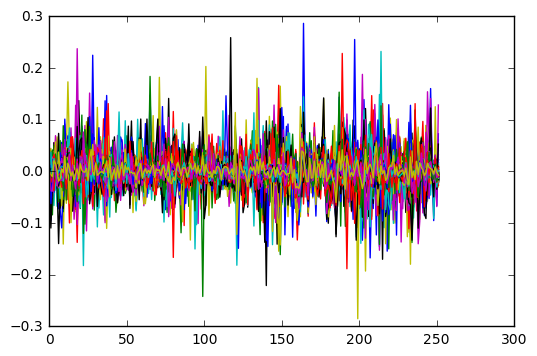

In [73]:
for item in priceDailyReturn.values.T:
    plt.plot(item)
plt.show()

In [74]:
#kmeans clustering
def cluster_data(data, n_clusters = 8):
    """
    input:
    data: the DataFrame needed to be clustered
    n_clusters: the number of clusters
    output:
    prediction: the label of clusters
    cluster_model: K-Means clustering method
    data: the data in DataFrame format
    """
    cluster_model = KMeans(n_clusters = n_clusters)
    predition = cluster_model.fit_predict(data)
    return predition, cluster_model, data

priceDailyReturnTrans = priceDailyReturn.T  # Transpose the dataframe
predition, model, data = cluster_data(priceDailyReturnTrans, n_clusters = 8)

In [75]:
print("Cluster Count: %s" % len(np.unique(predition)))

Cluster Count: 8


In [76]:
priceDailyReturnTrans["Cluster"] = predition
priceDailyReturnTrans.head()

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Cluster
MMM,0.0,-0.022553,-0.010664,0.007249,0.023967,-0.012284,-0.005445,-0.000747,-0.004856,-0.001126,...,-0.012966,0.003812,0.010103,0.014701,0.000198,0.000198,0.011044,-0.006410,-0.008360,4
ABT,0.0,0.000223,-0.011356,0.008108,0.020554,-0.010508,0.008407,-0.016101,-0.007397,-0.007453,...,-0.034467,0.007780,0.009991,0.013939,0.000000,-0.001552,0.017544,-0.012003,-0.007952,4
ABBV,0.0,-0.018819,-0.004950,0.040417,0.010459,-0.027355,-0.000304,-0.028803,0.004890,-0.012716,...,-0.011352,0.008253,0.024733,0.017191,-0.002049,0.004961,0.011915,0.005887,-0.009365,1
ACN,0.0,-0.016884,-0.007213,0.020989,0.015249,-0.001113,-0.003007,0.003575,-0.011689,-0.006871,...,-0.012880,0.010399,0.007476,0.006361,-0.001820,-0.001439,0.011914,0.005127,-0.012847,4
ATVI,0.0,-0.013910,-0.018640,-0.021561,0.009969,-0.018182,-0.002116,-0.015907,0.019935,-0.020074,...,-0.010291,0.007018,0.012132,-0.009436,0.002060,0.002826,0.014092,-0.003790,-0.018260,4


### 4.2.2. Visualize Clusters

In this part, we try to visualize the clusters we have done. First, we plot the changes of centroids of every clusters and then plot every cluster's stock line. So the stocks in the same cluster have the similar daily price changes.

In [77]:
def visualize_clusters(data, n_clusters = 8):
    prediction, model, c_data = cluster_data(data, n_clusters = n_clusters)
    c_data = pd.DataFrame(c_data, index = data.index, columns=data.columns)
    c_data["Clusters"] = prediction
    lines = []
    fig = plt.figure()
    axes = fig.add_subplot(111)
    for cluster in np.unique(prediction):
        axes.plot(model.cluster_centers_[cluster], "o-", alpha=0.5, linewidth=2)
    lines = axes.lines
    plt.show()
    for cluster in np.unique(prediction):
        temp_cluster_data = c_data[c_data["Clusters"] == cluster]
        print("Clusters: %s" % cluster)
        print("Members: %s" % ["%s : %s" % (symbol, callName(symbol)) for symbol in list(temp_cluster_data.index)])
        plt.figure()
        plt.title("Clusters#: %s" % cluster)
        temp_line = plt.plot(model.cluster_centers_[cluster], "o--", alpha=0.8, linewidth=2, c=lines[cluster].get_color())
        for symbol in temp_cluster_data.index:
            plt.plot(np.ravel(temp_cluster_data.loc[[symbol]].drop("Clusters",1).values), alpha=0.2, linewidth=2)
        
        plt.grid
        plt.show()
    return prediction, model, c_data

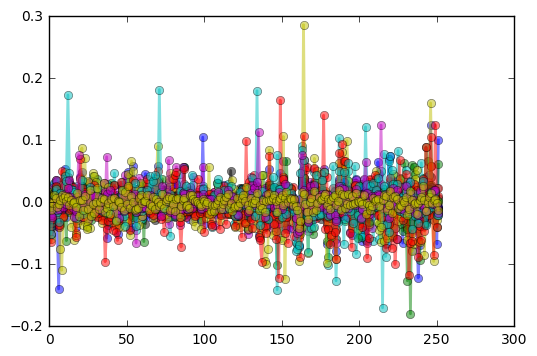

Clusters: 0
Members: ['TIF : Tiffany & Co.']


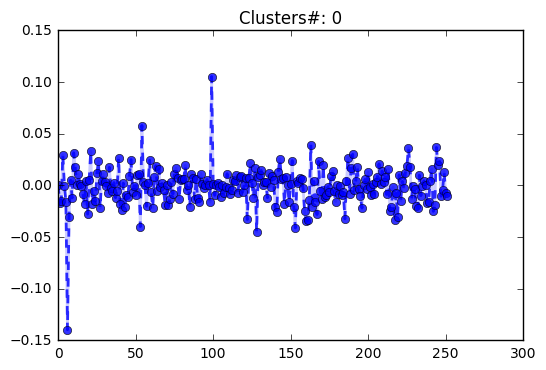

Clusters: 1
Members: ['ABBV : AbbVie', 'AET : Aetna Inc', 'ALK : Alaska Air Group Inc', 'ALXN : Alexion Pharmaceuticals', 'AGN : Allergan plc', 'AAL : American Airlines Group', 'ABC : AmerisourceBergen Corp', 'AMGN : Amgen Inc', 'ANTM : Anthem Inc.', 'BIIB : BIOGEN IDEC Inc.', 'BSX : Boston Scientific', 'BMY : Bristol-Myers Squibb', 'CAH : Cardinal Health Inc.', 'CCL : Carnival Corp.', 'CELG : Celgene Corp.', 'CNC : Centene Corporation', 'CERN : Cerner', 'CI : CIGNA Corp.', 'DAL : Delta Air Lines', 'EW : Edwards Lifesciences', 'ENDP : Endo International', 'EXPE : Expedia Inc.', 'ESRX : Express Scripts', 'GILD : Gilead Sciences', 'HCA : HCA Holdings', 'HOLX : Hologic', 'HUM : Humana Inc.', 'ILMN : Illumina Inc', 'LH : Laboratory Corp. of America Holding', 'LLY : Lilly (Eli) & Co.', 'MCK : McKesson Corp.', 'MDT : Medtronic plc', 'MYL : Mylan N.V.', 'PRGO : Perrigo', 'PFE : Pfizer Inc.', 'DGX : Quest Diagnostics', 'REGN : Regeneron', 'RCL : Royal Caribbean Cruises Ltd', 'LUV : Southwest A

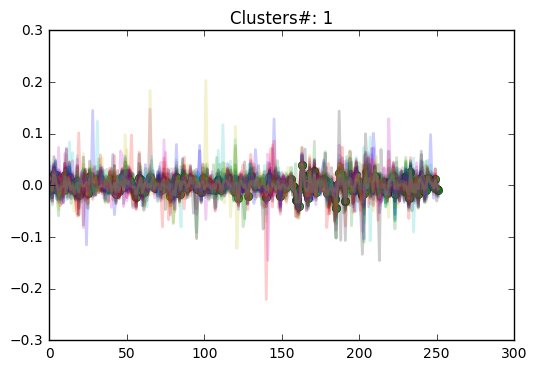

Clusters: 2
Members: ['AMP : Ameriprise Financial', 'BAC : Bank of America Corp', 'BBT : BB&T Corporation', 'COF : Capital One Financial', 'SCHW : Charles Schwab Corporation', 'C : Citigroup Inc.', 'CFG : Citizens Financial Group', 'CME : CME Group Inc.', 'CMA : Comerica Inc.', 'ETFC : E*Trade', 'FITB : Fifth Third Bancorp', 'GS : Goldman Sachs Group', 'HIG : Hartford Financial Svc.Gp.', 'HBAN : Huntington Bancshares', 'JPM : JPMorgan Chase & Co.', 'KEY : KeyCorp', 'LNC : Lincoln National', 'MTB : M&T Bank Corp.', 'MET : MetLife Inc.', 'MS : Morgan Stanley', 'NTRS : Northern Trust Corp.', "PBCT : People's United Financial", 'PNC : PNC Financial Services', 'PFG : Principal Financial Group', 'PRU : Prudential Financial', 'RF : Regions Financial Corp.', 'STT : State Street Corp.', 'STI : SunTrust Banks', 'BK : The Bank of New York Mellon Corp.', 'USB : U.S. Bancorp', 'UNM : Unum Group', 'WFC : Wells Fargo', 'ZION : Zions Bancorp']


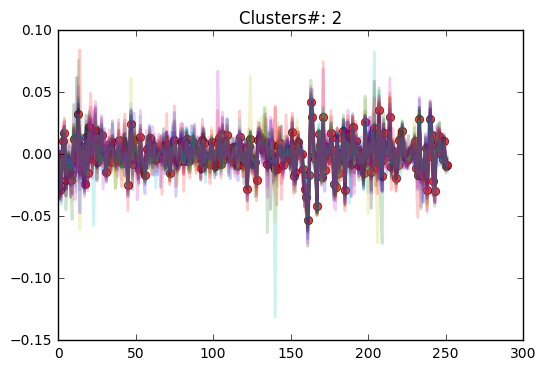

Clusters: 3
Members: ['ADI : Analog Devices, Inc.', 'INTC : Intel Corp.', 'KLAC : KLA-Tencor Corp.', 'LRCX : Lam Research', 'LLTC : Linear Technology Corp.', 'MCHP : Microchip Technology', 'MU : Micron Technology', 'NVDA : Nvidia Corporation', 'TXN : Texas Instruments', 'TRIP : TripAdvisor', 'XLNX : Xilinx Inc']


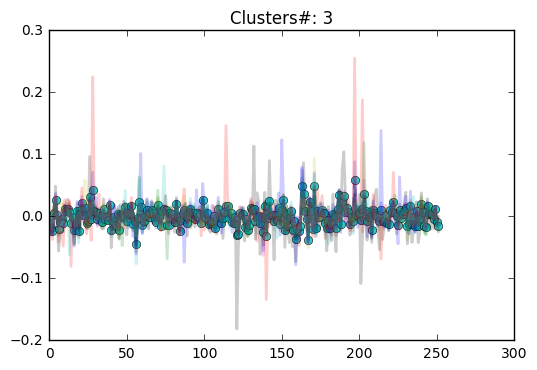

Clusters: 4
Members: ['ACN : Accenture plc', 'AMG : Affiliated Managers Group Inc', 'AFL : AFLAC Inc', 'A : Agilent Technologies Inc', 'APD : Air Products & Chemicals Inc', 'ALLE : Allegion', 'ADS : Alliance Data Systems', 'AIG : American International Group, Inc.', 'APH : Amphenol Corp A', 'AAPL : Apple Inc.', 'AMAT : Applied Materials Inc', 'AVY : Avery Dennison Corp', 'BLK : BlackRock', 'BWA : BorgWarner', 'CA : CA, Inc.', 'CBG : CBRE Group', 'CSCO : Cisco Systems', 'CTXS : Citrix Systems', 'CTSH : Cognizant Technology Solutions', 'DLPH : Delphi Automotive', 'DFS : Discover Financial Services', 'DNB : Dun & Bradstreet', 'EBAY : eBay Inc.', 'ECL : Ecolab Inc.', 'EMC : EMC Corp.', 'FFIV : F5 Networks', 'FIS : Fidelity National Information Services', 'FSLR : First Solar Inc', 'F : Ford Motor', 'BEN : Franklin Resources', 'GPN : Global Payments Inc', 'GT : Goodyear Tire & Rubber', "HAR : Harman Int'l Industries", 'HRS : Harris Corporation', "HON : Honeywell Int'l Inc.", 'ITW : Illinois 

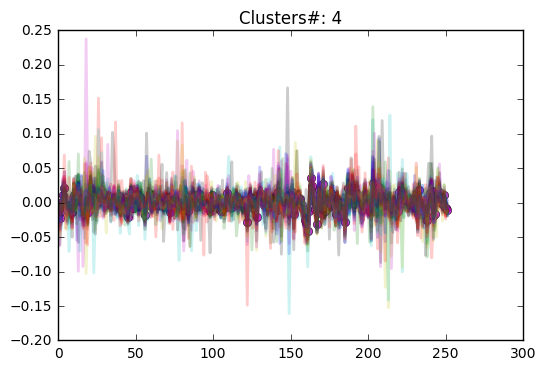

Clusters: 5
Members: ['AMT : American Tower Corp A', 'AIV : Apartment Investment & Mgmt', 'AVB : AvalonBay Communities, Inc.', 'BXP : Boston Properties', 'DLR : Digital Realty Trust', 'EQR : Equity Residential', 'ESS : Essex Property Trust Inc', 'EXR : Extra Space Storage', 'FRT : Federal Realty Investment Trust', 'GGP : General Growth Properties Inc.', 'HCP : HCP Inc.', 'HST : Host Hotels & Resorts', 'IRM : Iron Mountain Incorporated', 'KIM : Kimco Realty', 'MAC : Macerich', 'PLD : Prologis', 'PSA : Public Storage', 'O : Realty Income Corporation', 'SPG : Simon Property Group Inc', 'SLG : SL Green Realty', 'UDR : UDR Inc', 'VTR : Ventas Inc', 'VNO : Vornado Realty Trust', 'HCN : Welltower Inc.', 'WY : Weyerhaeuser Corp.']


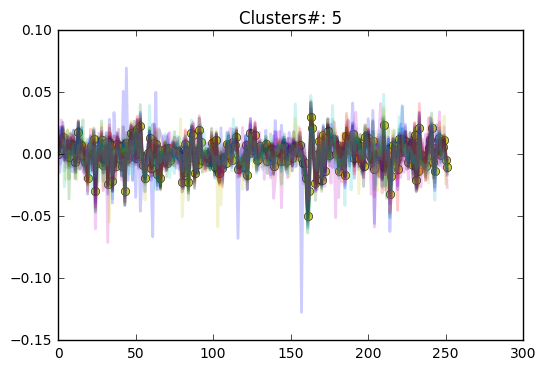

Clusters: 6
Members: ['MPC : Marathon Petroleum', 'PSX : Phillips 66', 'TSO : Tesoro Petroleum Co.', 'VLO : Valero Energy', 'WMB : Williams Cos.']


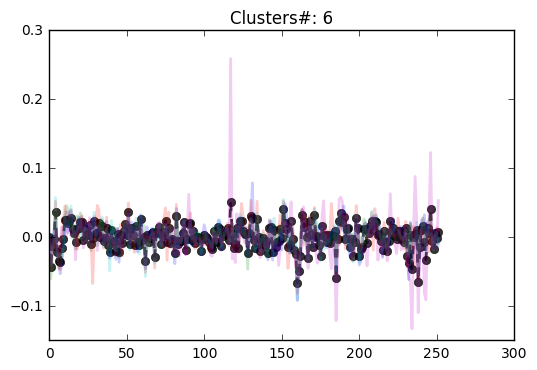

Clusters: 7
Members: ['RRC : Range Resources Corp.', 'SWN : Southwestern Energy']


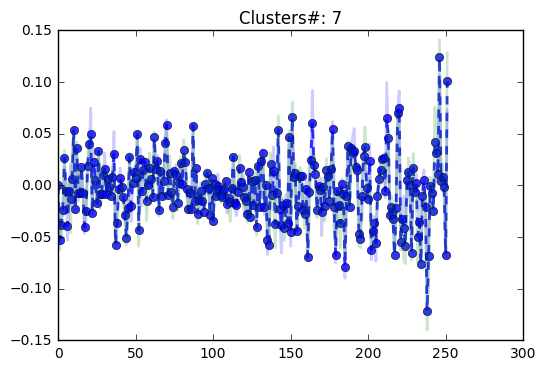

In [ ]:
priceDailyReturnTrans2 = priceDailyReturn.T
prediction, model, c_data = visualize_clusters(priceDailyReturnTrans2,n_clusters = 20)